#                       Application to image denoising

In [4]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 
noise_factor = 0.5 # set as argument
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0,
size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0,
size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

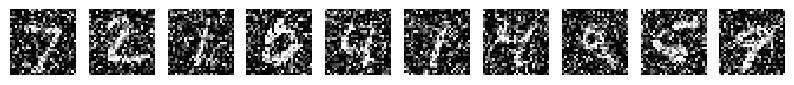

In [5]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
 # display noisy
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test_noisy[i].reshape(28, 28))
 plt.gray()
 ax.set_axis_off()
plt.show()

#  Application to image denoising avec RmsProp et nb batch-size 32 et epoch 100

In [7]:
from tensorflow import keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
import sys
input_img = Input(shape=(28, 28, 1)) # adapt this if using `channels_first`image data forma

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy','mse','mae'])
autoencoder.summary()
autoencoder_train=autoencoder.fit(x_train_noisy, x_train,
 epochs=100,
 batch_size=32,
 shuffle=True,
 validation_data=(x_test, x_test),verbose=1)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0   

60000/60000 [==============================] - 169s 3ms/step - loss: 0.0942 - accuracy: 0.8137 - mse: 0.0104 - mae: 0.0348 - val_loss: 0.0744 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0200
Epoch 32/100
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0942 - accuracy: 0.8137 - mse: 0.0104 - mae: 0.0348 - val_loss: 0.0752 - val_accuracy: 0.8143 - val_mse: 0.0045 - val_mae: 0.0206
Epoch 33/100
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0941 - accuracy: 0.8137 - mse: 0.0103 - mae: 0.0348 - val_loss: 0.0748 - val_accuracy: 0.8143 - val_mse: 0.0044 - val_mae: 0.0203
Epoch 34/100
60000/60000 [==============================] - 483s 8ms/step - loss: 0.0941 - accuracy: 0.8137 - mse: 0.0103 - mae: 0.0347 - val_loss: 0.0744 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0201
Epoch 35/100
60000/60000 [==============================] - 187s 3ms/step - loss: 0.0941 - accuracy: 0.8137 - mse: 0.0103 - mae: 0.0347 - val_loss: 0.0743 - 

60000/60000 [==============================] - 169s 3ms/step - loss: 0.0933 - accuracy: 0.8137 - mse: 0.0101 - mae: 0.0342 - val_loss: 0.0745 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0201
Epoch 70/100
60000/60000 [==============================] - 170s 3ms/step - loss: 0.0933 - accuracy: 0.8138 - mse: 0.0101 - mae: 0.0342 - val_loss: 0.0740 - val_accuracy: 0.8143 - val_mse: 0.0042 - val_mae: 0.0199
Epoch 71/100
60000/60000 [==============================] - 15013s 250ms/step - loss: 0.0932 - accuracy: 0.8137 - mse: 0.0101 - mae: 0.0341 - val_loss: 0.0742 - val_accuracy: 0.8143 - val_mse: 0.0042 - val_mae: 0.0199
Epoch 72/100
60000/60000 [==============================] - 203s 3ms/step - loss: 0.0932 - accuracy: 0.8137 - mse: 0.0101 - mae: 0.0341 - val_loss: 0.0740 - val_accuracy: 0.8143 - val_mse: 0.0042 - val_mae: 0.0199
Epoch 73/100
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0932 - accuracy: 0.8137 - mse: 0.0101 - mae: 0.0341 - val_loss: 0.073

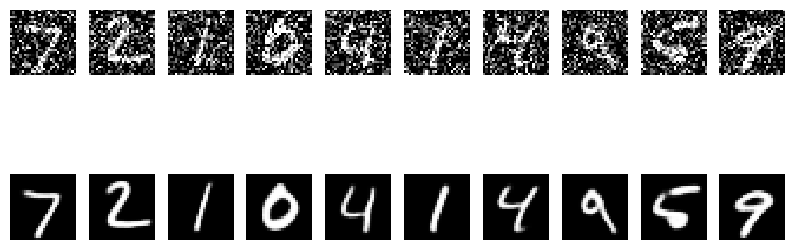

In [8]:
import matplotlib.pyplot as plt
n = 10
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
 # display noisy
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test_noisy[i].reshape(28, 28))
 plt.gray()
 ax.set_axis_off()
 # display reconstruction
 ax = plt.subplot(2, n, i + n + 1)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.set_axis_off()
plt.show()

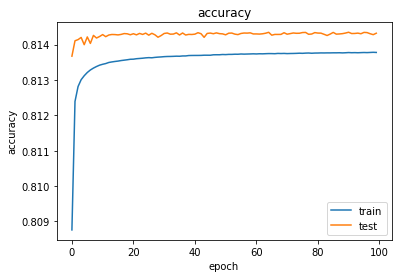

In [9]:
plt.title('accuracy')

plt.plot(autoencoder_train.history['accuracy'],label='train')
plt.plot(autoencoder_train.history['val_accuracy'],label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

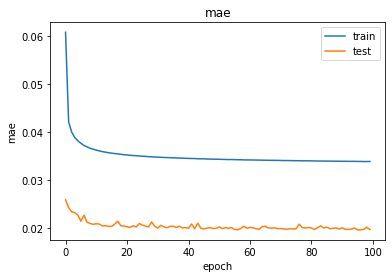

In [10]:
plt.title('mae')

plt.plot(autoencoder_train.history['mae'],label='train')
plt.plot(autoencoder_train.history['val_mae'],label='test')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend()

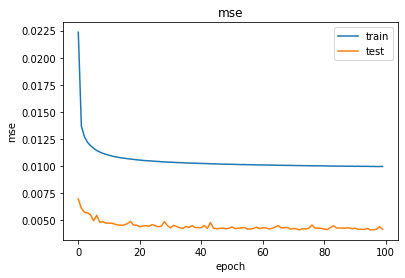

In [11]:
plt.title('mse')

plt.plot(autoencoder_train.history['mse'],label='train')
plt.plot(autoencoder_train.history['val_mse'],label='test')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()

#  Application to image denoising avec adadelta et nb batch-size 32 et epoch 100

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy','mse','mae'])
autoencoder_train=autoencoder.fit(x_train_noisy, x_train,
 epochs=100,
 batch_size=50,
 shuffle=True,
 validation_data=(x_test, x_test),verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0928 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0338 - val_loss: 0.0739 - val_accuracy: 0.8143 - val_mse: 0.0042 - val_mae: 0.0198
Epoch 2/100
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0928 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0338 - val_loss: 0.0742 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0200
Epoch 3/100
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0928 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0338 - val_loss: 0.0740 - val_accuracy: 0.8143 - val_mse: 0.0042 - val_mae: 0.0197
Epoch 4/100
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0928 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0338 - val_loss: 0.0737 - val_accuracy: 0.8143 - val_mse: 0.0041 - val_mae: 0.0196
Epoch 5/100
60000/60000 [==============================] - 171s 3ms/step - loss: 0.0928 - accuracy

60000/60000 [==============================] - 207s 3ms/step - loss: 0.0927 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0337 - val_loss: 0.0738 - val_accuracy: 0.8143 - val_mse: 0.0041 - val_mae: 0.0198
Epoch 40/100
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0927 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0337 - val_loss: 0.0739 - val_accuracy: 0.8143 - val_mse: 0.0042 - val_mae: 0.0198
Epoch 41/100
60000/60000 [==============================] - 209s 3ms/step - loss: 0.0926 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0337 - val_loss: 0.0742 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0201
Epoch 42/100
60000/60000 [==============================] - 206s 3ms/step - loss: 0.0927 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0337 - val_loss: 0.0743 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0201
Epoch 43/100
60000/60000 [==============================] - 201s 3ms/step - loss: 0.0926 - accuracy: 0.8138 - mse: 0.0099 - mae: 0.0337 - val_loss: 0.0746 - 

60000/60000 [==============================] - 183s 3ms/step - loss: 0.0925 - accuracy: 0.8138 - mse: 0.0098 - mae: 0.0336 - val_loss: 0.0742 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0198
Epoch 78/100
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0925 - accuracy: 0.8138 - mse: 0.0098 - mae: 0.0336 - val_loss: 0.0741 - val_accuracy: 0.8143 - val_mse: 0.0043 - val_mae: 0.0199
Epoch 79/100
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0925 - accuracy: 0.8138 - mse: 0.0098 - mae: 0.0336 - val_loss: 0.0753 - val_accuracy: 0.8142 - val_mse: 0.0046 - val_mae: 0.0208
Epoch 80/100
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0925 - accuracy: 0.8138 - mse: 0.0098 - mae: 0.0336 - val_loss: 0.0738 - val_accuracy: 0.8143 - val_mse: 0.0041 - val_mae: 0.0196
Epoch 81/100
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0925 - accuracy: 0.8138 - mse: 0.0098 - mae: 0.0336 - val_loss: 0.0739 - 

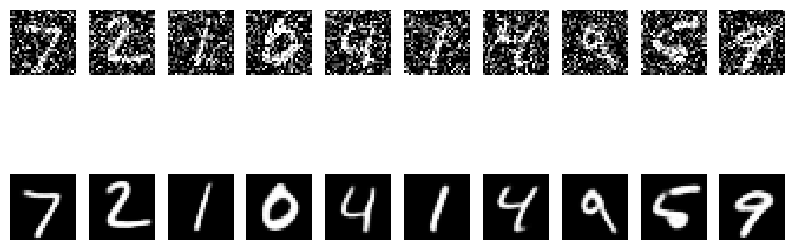

In [13]:
import matplotlib.pyplot as plt
n = 10
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(10, 4), dpi=100)
for i in range(n):
 # display noisy
 ax = plt.subplot(2, n, i + 1)
 plt.imshow(x_test_noisy[i].reshape(28, 28))
 plt.gray()
 ax.set_axis_off()
 # display reconstruction
 ax = plt.subplot(2, n, i + n + 1)
 plt.imshow(decoded_imgs[i].reshape(28, 28))
 plt.gray()
 ax.set_axis_off()
plt.show()

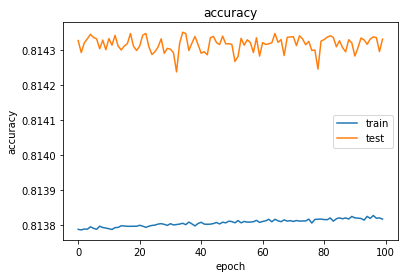

In [14]:
plt.title('accuracy')

plt.plot(autoencoder_train.history['accuracy'],label='train')
plt.plot(autoencoder_train.history['val_accuracy'],label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

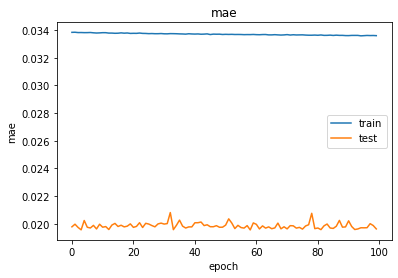

In [15]:
plt.title('mae')

plt.plot(autoencoder_train.history['mae'],label='train')
plt.plot(autoencoder_train.history['val_mae'],label='test')
plt.xlabel('epoch')
plt.ylabel('mae')
plt.legend()

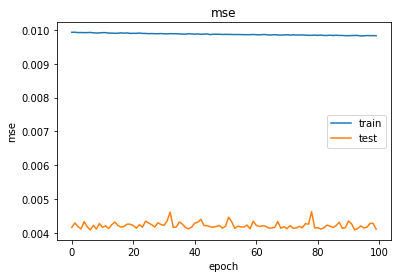

In [16]:
plt.title('mse')

plt.plot(autoencoder_train.history['mse'],label='train')
plt.plot(autoencoder_train.history['val_mse'],label='test')
plt.xlabel('epoch')
plt.ylabel('mse')
plt.legend()